In [1]:
# This document needs the filew ripples.jpeg, eiffel tower.jpg and eiffel tower wide.jpg stored in Drive uploaded by clicking on the left menu before beginning the simulation.

## MRI TECHNIQUE CONCEPTS APPLIED TO PHILIPS MAGNETS:

#### RECEIVER BANDWIDTH:

The RBW is a property of the ADC, and can be defined equivalently in the frequency domain or in the time (space) domain.

In the time domain is the inverse of the **dwell time**: $\small \text{RBw = }\frac {1}{ \text{Dwell time}}.$

The **acquisition or sample time** of the signal is  $\small \text{Dwell time} \times \text{no. samples (freq. dir.)}.$

In frequency space it is the range of frequencies sampled.

Since there is a duality between a box funtion and a sinc function, a tight range of frequencies will need a longer sampling time during the digitation process.

Each frequency can be sampled by the receiver for a shorter or longer period of time, and the longer each frequency represented in K space is sampled (lower bandwidth), the higher the signal-to-noise (SNR) will be, at the cost of a slower readout rate.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
No handles with labels found to put in legend.


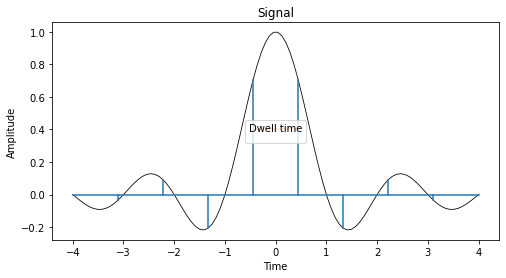

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4))
x = np.linspace(-4, 4, 100)
np.sinc(x)
v = np.linspace(-4,4,10)
v, w = (v,np.sinc(v))
plt.plot(x, np.sinc(x), color='k', LineWidth=.8)
plt.title("Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.stem(v, w, basefmt= 'C0', markerfmt=' ')
x_coordinates = [v[4], v[5]]
y_coordinates = [0.4, 0.4]
plt.plot(x_coordinates, y_coordinates)
plt.legend(loc='center', title='Dwell time')
plt.show()

If we need a signal contained within a tight bandwidth limitation, the signal in the time domain will look like this...

No handles with labels found to put in legend.
No handles with labels found to put in legend.


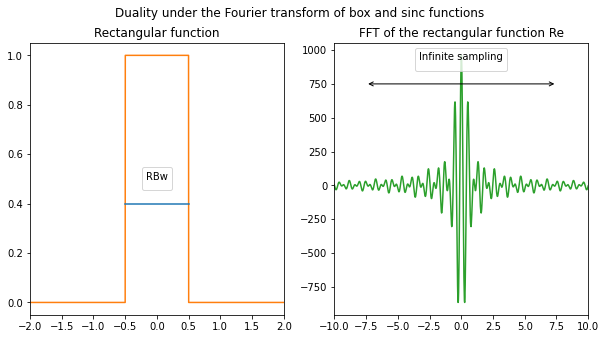

In [3]:
import scipy.fftpack
N = 50000 # Number of sampled points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(-2, N*T, N)
y = np.zeros(x.shape)
for i in range(x.shape[0]):
    if x[i] > -0.5 and x[i] < 0.5: y[i] = 1.0

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)
xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Duality under the Fourier transform of box and sinc functions')

axs[0].plot(x, y, 'tab:orange')
axs[0].set_title('Rectangular function')
axs[0].set_xlim(-2,2)
plt.xlim(-2,2)
x_coordinates = [-0.5, 0.5]
y_coordinates = [0.4, 0.4]
axs[0].plot(x_coordinates, y_coordinates)
axs[0].legend(loc='center', title='RBw')

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)

axs[1].plot(xf, np.real(yf),'tab:green')
axs[1].set_title('FFT of the rectangular function Re')
axs[1].set_xlim(-10,10)
x_coordinates = [-8.0, 8.5]
y_coordinates = [800, 800]
axs[1].annotate(s='', xy=(-7.5,750), xytext=(7.5,750), arrowprops=dict(arrowstyle='<->'))
axs[1].legend(loc='upper center', title='Infinite sampling')

plt.show()

#### PACKAGES vs STACKS:

Packages are groupings of images within a TR (temporal groups) as opposed to stacks, which are spatial groups, such as slices through different discs in the spine.

Stacks can be prescribed to overlap in space, but if they are not scanned as separate packages there may be cross talk. If all stacks are acquired in one single package, the images are obtained interleaved. Interleaved scans will not increase time.

However, this may lead to multiple stack artifact, for instance between stacks across different discs in the spine: Interference between the different slices occurs which results in signal loss resulting in black lines. To remedy this stacks can be obtained in different packages (Parameter ‘Stacks as packages’).

If the time per stack is not adjustable, then a whole extra stack (= Package, set of TRs) will be required if the number of slices exceeds what fits. So if the min TR necessary to cover 10 slices in the first package is 50, even though there may only be 2 additional slices in the second package, the TR will still be 50.

Packages defines how many times the TR should be divided to better accommodate several groups of slices, in multi-slice scans. In conjunction with TR, the Packages parameter defines in how many single sequential measurements the slices will be distributed by.  It can only affect SNR by changing TR. Increasing the number of packages will lead to increase acquisition time if TR is maintained, because the difference between defined TR and minimal TR increases.

Packages is best used in partnership with turbo factor in order to obtain the best acquisition time out of the desired TR (considering the number of slices), or to attain low TRs, in multi-slice acquisition, when a large number slices are acquired in a single sequence

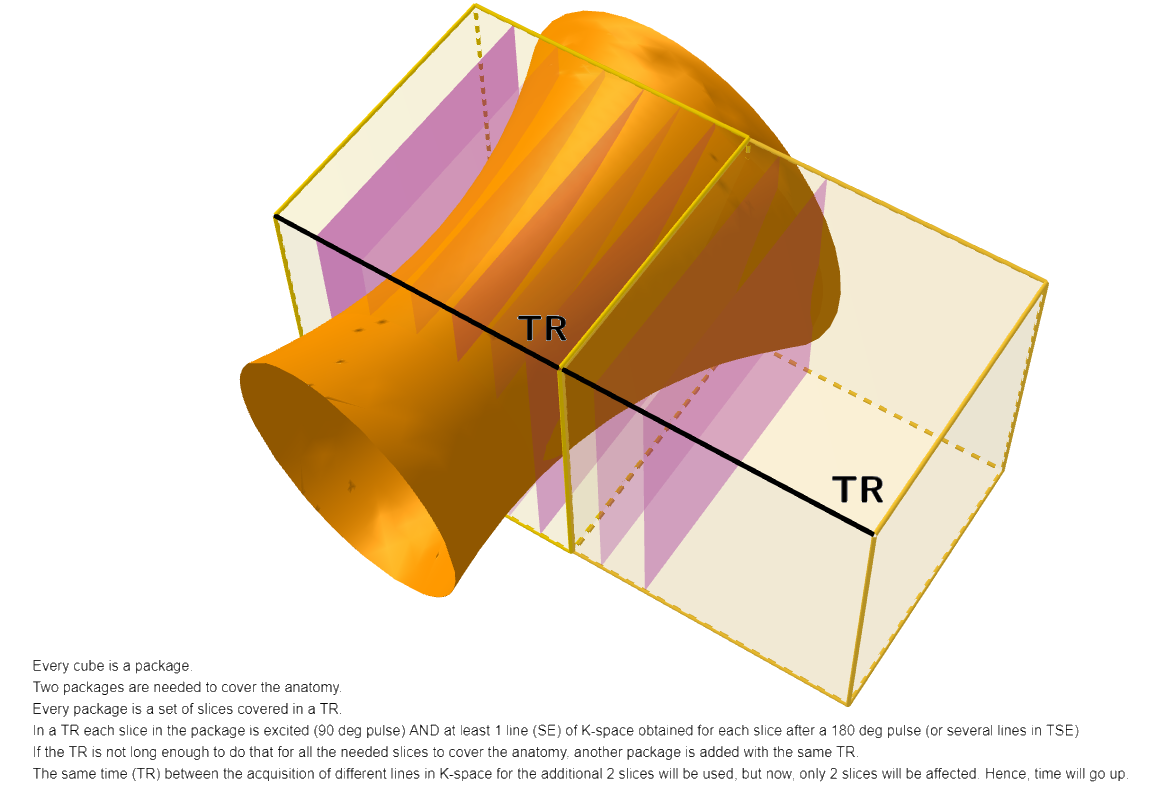

#### RECTANGULAR FIELD OF VIEW:

Rectangular FoV is possible. The dissociation of voxel size and FoV is an advantage in this regard.

The field-of- view (FOV) is inversely related to the spacing $(\Delta k)$ of samples in k-space. Different sampling rates along the frequency and phase axes, i.e. $\text{FOV}_\nu = 1 / \Delta k_\text f$ and $\text{FOV}_{\text p} = 1 / \Delta k_\text{p}$ will result in rectangular FOV. For example, a rectangular FOV with a $1:2$ ratio is obtained by sampling alternate phase-encode lines in k-space while leaving the phase-encoding gradient unchanged. This will half the number of phase-encoding steps, and the increment between successive steps. 
The sampling rate and hence the field-of-view in the frequency-encode direction is unchanged.  Furthermore, because both the FOV in the phase direction and number of steps have been reduced by one-half, pixel size in the phase-encode direction (FOVp / Np) and overall spatial resolution of the image are also unchanged. 

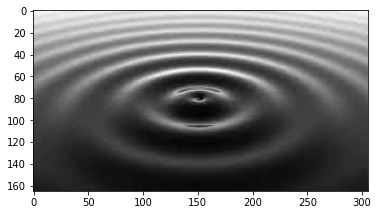

In [4]:
import scipy.fftpack
import cv2

from PIL import Image
img = Image.open('ripples.jpeg').convert('L')
plt.imshow(img, cmap = 'gray')

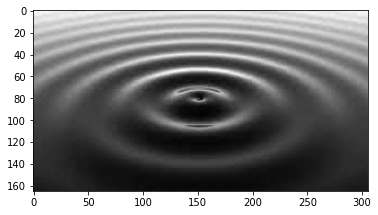

In [5]:
# fft 
f = np.fft.fft2(img)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

The [pixel size won't change](https://mriquestions.com/field-of-view-fov.html) if the minimum and maximum frequencies are unaltered:

>The defined field-of view (FOV) and pixel width (Δw) determine the number of digitized samples in k-space that must be obtained to reconstruct an image with the desired resolution. FOV is inversely proportional to the spacing between samples in k-space. Specifically, Δk = 1/FOV. 
From symmetry considerations an inverse relation also holds between pixel width (Δw) and the range between the highest positive (+kmax) and negative (−kmax) spatial frequencies in k-space. Defining kFOV = (+kmax) − (−kmax) = 2 kmax, the relationship is given by Δw = 1/kFOV.

However in a [rectangular FoV](https://mriquestions.com/rectangular-fov.html) aliasing is a consideration.

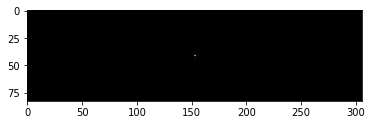

In [6]:
x = fshifted
mat = x[np.arange(0,np.shape(x)[0],2)] # Takes out every other row off the frequencies.
freq = np.abs(mat)
plt.imshow(freq, cmap='gray')

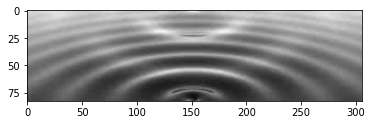

In [7]:
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

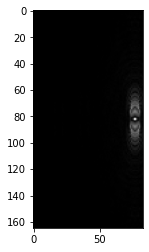

In [8]:
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[0],2)]
freq = np.abs(mat)
plt.imshow(freq, cmap='gray')

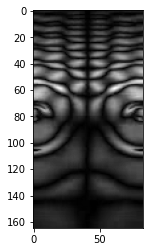

In [9]:
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

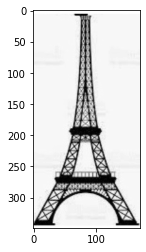

In [10]:
img = Image.open('eiffel tower.jpg').convert('L')
plt.imshow(img, cmap = 'gray')
# fft 
f = np.fft.fft2(img)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

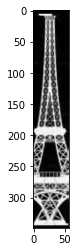

In [11]:
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[1],3)]
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

(362, 403)


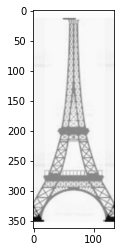

In [12]:
img = Image.open('eiffel tower wide.jpg').convert('L')
plt.imshow(img, cmap = 'gray')
# fft 
f = np.fft.fft2(img)
print(f.shape)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[1],3)]
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

#### FOLD OVER DIRECTION AND FOLDOVER SUPPRESSION (NO PHASE WRAP):

The direction of the NPW is the phase direction. Always.

In the ankle, doing fold-over suppression in the direction of the tibia (Head to Foot / CC) would be prohibitive. So the idea is to avoid the other ankle by perhaps introducing oversampling. Unintuitively, the foldover in the knee is head to toe because the popliteal vessels are considered to be more of a problem.

The key question seems to be in what direction is worth doing foldover suppression (no-phase wrap).

Foldover suppression can be accomplished with sat bands (REST slabs) as an alternative, which can be more efficient in 1.5 Tesla magnets.

FOS happens along the phase direction, although not necessarily symmetrically around the anatomy covered. If SENSE is being used the FOS will nearly duplicate the FoV (there are system requirement). If no SENSE is used the FOS only needs to cover what the coil can see.

If oversampling has to increase, the rule is to decrease NSA.